In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!cd ../; make owid_data_hash

{ \
	cd owid-datasets/ ;\
	git rev-parse HEAD ;\
}
6ffb8900332bb0d75ceb8da6cd37c4f313efaa63


In [3]:
DATA="Labor Productivity - The Conference Board Total Economy Database (2016) "

In [4]:
DATA_PATH = os.path.join("../owid-datasets/datasets/", DATA, DATA + ".csv" )

In [5]:
df = pd.read_csv(DATA_PATH)

In [6]:
df.head()

,Entity,Year,Labor productivity per hour worked (The Conference Board Total Economy Database (2016))
0,Argentina,1950,6.42543
1,Argentina,1951,6.56020
2,Argentina,1952,6.11710
3,Argentina,1953,6.33360
4,Argentina,1954,6.47971


In [7]:
VAR = "Labor productivity per hour worked (The Conference Board Total Economy Database (2016))"

In [8]:
df["Entity"].unique()

array(['Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh',
       'Barbados', 'Belgium', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic',
       'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saint Lucia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailand', 'Trinidad and Tobago', 'Turkey',
       'United Kingdom', 'United States', 'Uruguay', 'USSR', 'Venezuela',
       'Vietnam', 'West Germany'], dtype=object)

In [9]:
n_df = pd.DataFrame(columns=df.columns.drop("Entity"))

In [10]:
for y in df["Year"].unique():
     row = pd.Series([y, df[df["Year"] == y][VAR].mean()], index=df.columns.drop("Entity"))
     n_df = n_df.append(row, ignore_index=True)

In [11]:
n_df.head()
x_min, x_max = n_df["Year"].min(), n_df["Year"].max()
y_min, y_max = n_df[VAR].min(), n_df[VAR].max()

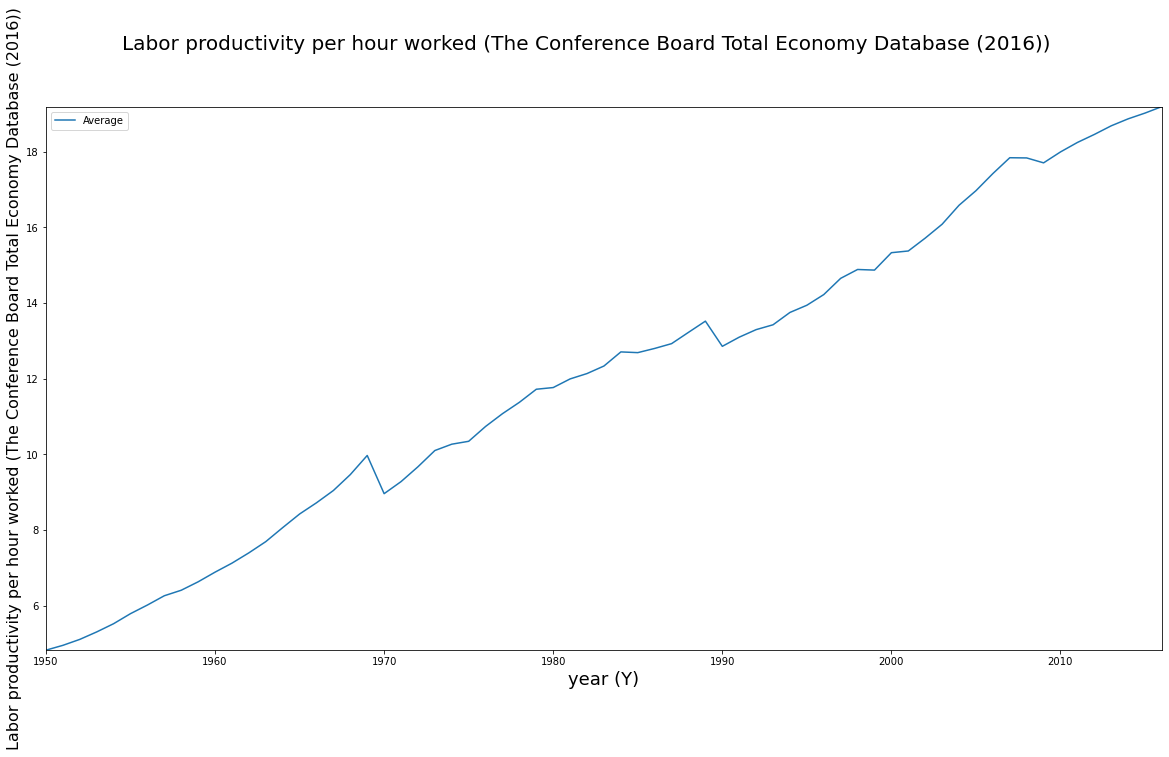

In [12]:
fig = plt.figure(figsize=(20,10))
plt.plot(n_df["Year"], n_df[VAR], label="Average")
plt.axis([x_min, x_max, y_min, y_max])
plt.legend(loc="upper left")
fig.suptitle(VAR, fontsize=20)
plt.xlabel('year (Y)', fontsize=18)
plt.ylabel(VAR, fontsize=16)
plt.show()